## Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

### 1. ÌôòÍ≤ΩÏ§ÄÎπÑ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
# Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

In [3]:
# ÏûîÏ∞®Î∂ÑÏÑù Ìï®Ïàò
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

In [4]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date', 'sales'])
data = data.loc[data['date']<= '2014-10-31'].reset_index(drop = True)
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.day_name().str.slice(0,3)
data.head()

date  sales weekday
0 2013-01-01     45     Tue
1 2013-01-02     53     Wed
2 2013-01-03     65     Thu
3 2013-01-04     66     Fri
4 2013-01-05     97     Sat

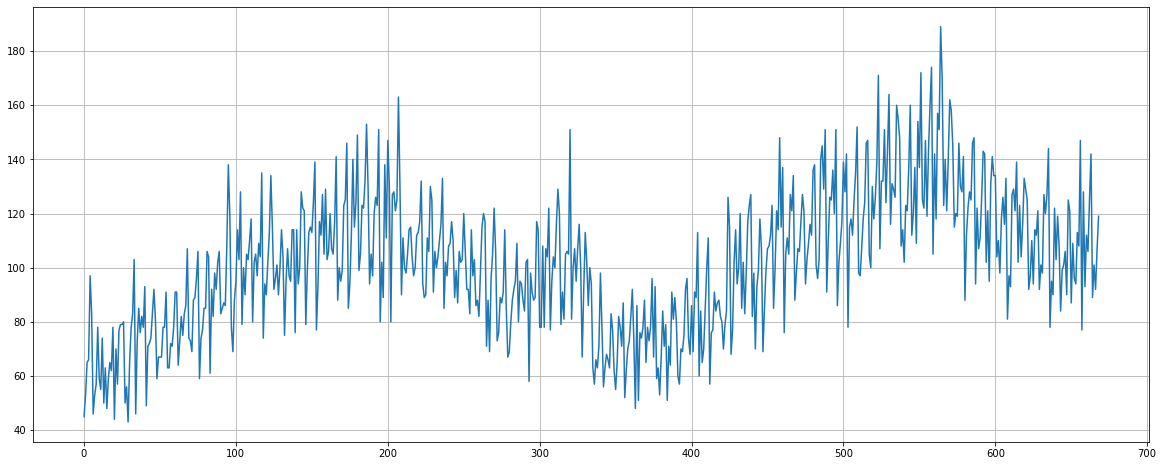

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

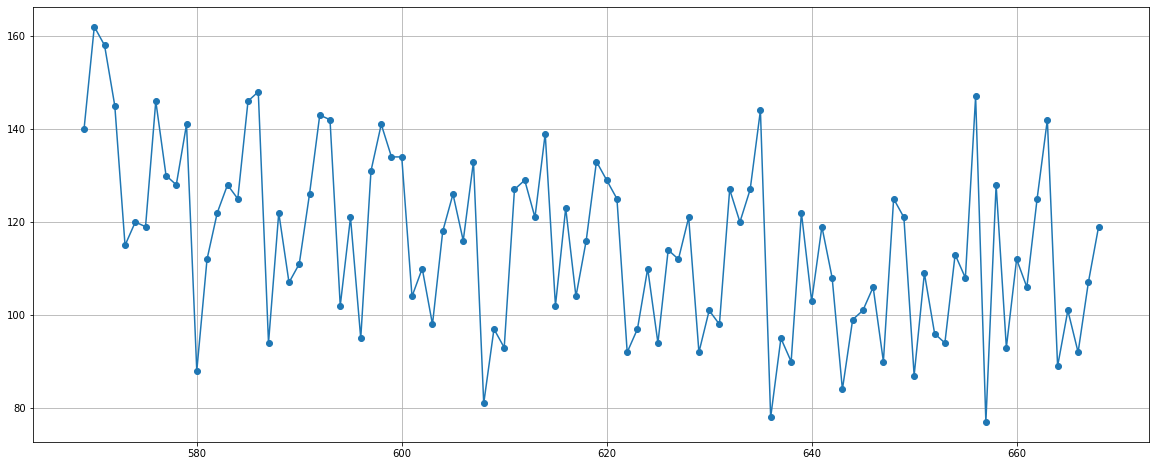

In [6]:
temp = data[-100:]
plt.figure(figsize = (20,8))
plt.plot(temp['sales'], marker ='o')
plt.grid()
plt.show()

### 2. Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [7]:
# y ÎßåÎì§Í∏∞
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  sales weekday     y
0 2013-01-01     45     Tue  53.0
1 2013-01-02     53     Wed  65.0
2 2013-01-03     65     Thu  66.0
3 2013-01-04     66     Fri  97.0
4 2013-01-05     97     Sat  83.0

date  sales weekday      y
664 2014-10-27     89     Mon  101.0
665 2014-10-28    101     Tue   92.0
666 2014-10-29     92     Wed  107.0
667 2014-10-30    107     Thu  119.0
668 2014-10-31    119     Fri    NaN

In [8]:
data.dropna(axis = 0, inplace = True)
data.tail()

date  sales weekday      y
663 2014-10-26    142     Sun   89.0
664 2014-10-27     89     Mon  101.0
665 2014-10-28    101     Tue   92.0
666 2014-10-29     92     Wed  107.0
667 2014-10-30    107     Thu  119.0

In [9]:
# x, y ÎÇòÎàÑÍ∏∞
target = 'y'
x = data.drop([target, 'date'], axis = 1)
y = data.loc[:, target]

In [10]:
# train, val ÎÇòÎàÑÍ∏∞
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

### 3. Î™®Îç∏ÎßÅ1 : ARIMA

- yÍ∞Ä Stationary Ìï¥Ïïº Ìï®.
    - ÌèâÍ∑†, Î∂ÑÏÇ∞, Í≥µÎ∂ÑÏÇ∞Ïù¥ ÏùºÏ†ï.
    
    
- Ï∞®Î∂Ñ (Î≥ÄÌôîÎüâ)
    - ARÍ≥º MAÎ•º Í≤∞Ìï©Ìï† Í≤É.
    - Îç∞Ïù¥ÌÑ∞Í∞Ä StationaryÌïòÏßÄ ÏïäÏùÑ Îïå Ï∞®Î∂ÑÏùÑ ÏßÑÌñâÌïú Í≤ÉÏù¥ ARIMA.

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00853
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.27897
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


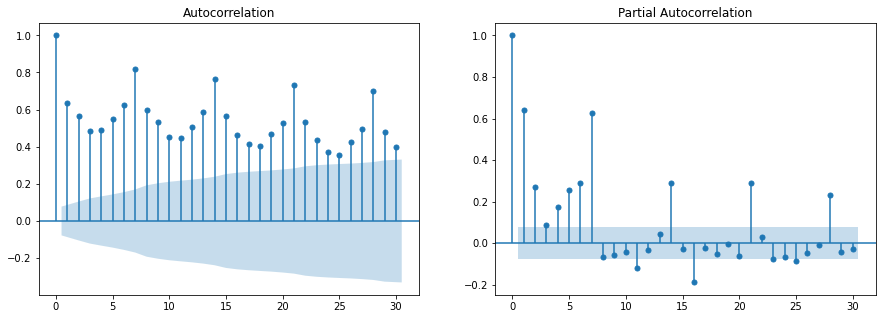

In [11]:
# yÍ∞í ÏÇ¥Ìé¥Î≥¥Í∏∞ (Î™®Îç∏ÎßÅ ÌïòÏßÄ ÏïäÏùÄ Ï±ÑÎ°ú ÏûîÏ∞® ÌôïÏù∏)
residual_diag(y_train, lags = 30)

- Ïã§Ï†úÍ∞í = Î™®Îç∏ + ÏûîÏ∞®
- ÏûîÏ∞® = y_trainÏù∏ ÏÉÅÌÉúÏóêÏÑú Ï†ïÍ∑úÏÑ±, Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï.
- Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ÏÑú Í≤ÄÏ†ïÌïòÎ©¥ Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥Îì§ Í≤ÉÏúºÎ°ú ÏòàÏÉÅ.

#### Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

- p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÏßÄ?
- ARÏùò p Ï∞®ÏàòÏôÄ MAÏùò q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌïòÎã§.

In [12]:
# ARIMA Î™®Îç∏ÎßÅ
m1_1 = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit() # dÍ∞Ä 0Ïù¥Î©¥ ARMAÏôÄ Í∞ôÏùÄ Î™®Îç∏
m1_2 = sm.tsa.SARIMAX(y_train, order=(1,1,1)).fit()

#### ÌèâÍ∞Ä

- 1. ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.38791
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.00088
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


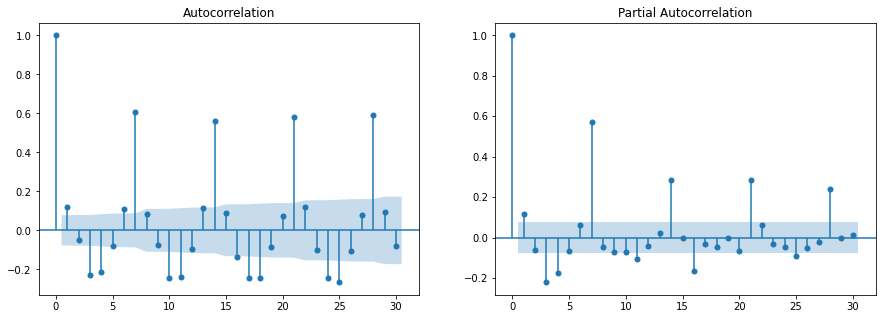

In [13]:
residuals = m1_1.resid
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.07599
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.00115
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


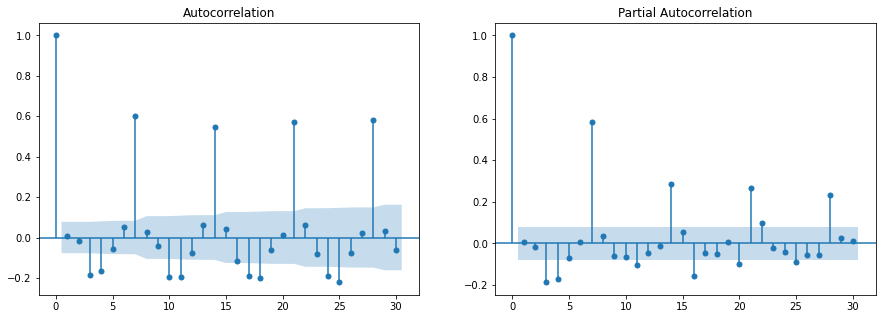

In [14]:
residuals = m1_2.resid
residual_diag(residuals)

- 2. AIC
    - ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄ.
    - Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏.
    - Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [15]:
print('model1 AIC :', m1_1.aic)
print('model2 AIC :', m1_2.aic)

model1 AIC : 5464.670363960708
model2 AIC : 5442.769868773823


- 3. Validation

    - ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ ÏãúÍ∞ÅÌôî

In [16]:
pred = m1_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 12.918460959652306
MAPE: 0.12228691428354797


In [17]:
pred = m1_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 13.123421572150058
MAPE: 0.12539084122967378


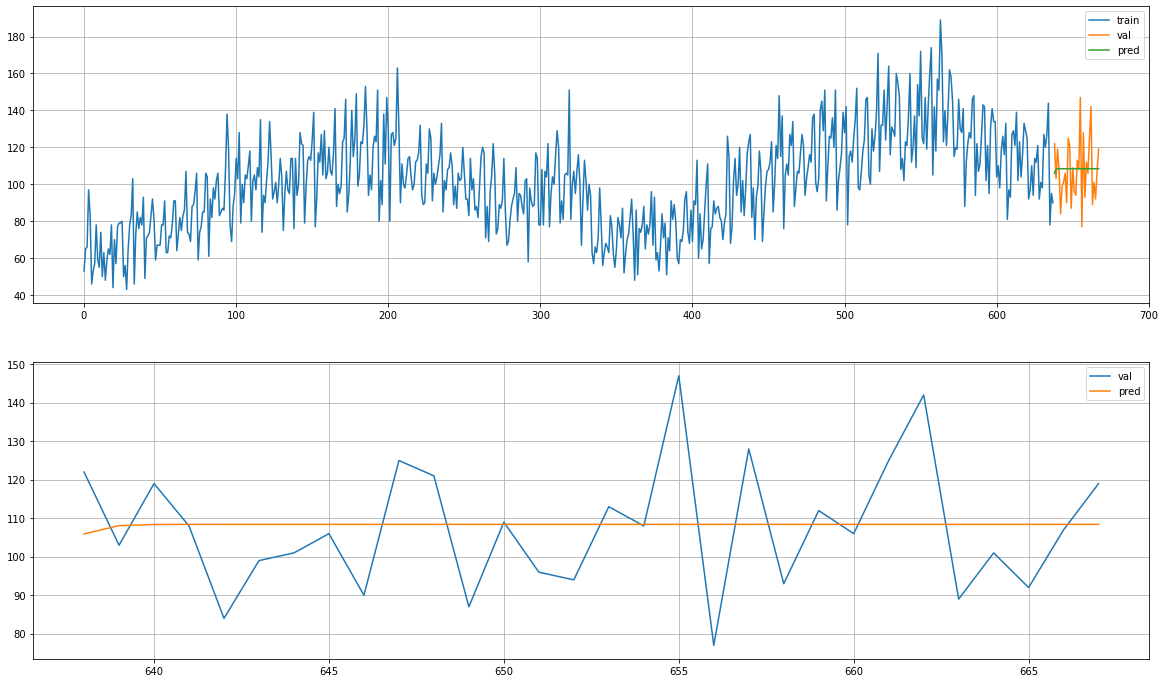

In [18]:
plot_model_result(y_train, y_val, pred)

#### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

#### 1) ÌïôÏäµ

- Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï

In [19]:
from itertools import product

In [20]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = [1,2,3,4]
q = [1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

- ÌäúÎãù

In [21]:
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [22]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)        mae          aic
11     (3, 1, 4)  11.057151  5219.319721

params(p,d,q)      mae         aic
10     (3, 1, 3)  11.5905  5171.92015

In [23]:
result

params(p,d,q)        mae          aic
0      (1, 1, 1)  13.123422  5442.769869
1      (1, 1, 2)  13.136196  5439.502307
2      (1, 1, 3)  13.098455  5442.860648
3      (1, 1, 4)  12.958563  5391.056782
4      (2, 1, 1)  13.108983  5443.032758
5      (2, 1, 2)  13.159205  5437.968365
6      (2, 1, 3)  12.806870  5409.107320
7      (2, 1, 4)  12.952655  5393.052762
8      (3, 1, 1)  12.902352  5406.736006
9      (3, 1, 2)  12.680277  5339.585835
10     (3, 1, 3)  11.590500  5171.920150
11     (3, 1, 4)  11.057151  5219.319721
12     (4, 1, 1)  13.114888  5367.808299
13     (4, 1, 2)  13.262343  5369.943495
14     (4, 1, 3)  12.503656  5311.391573
15     (4, 1, 4)  11.647624  5172.008445

In [24]:
m1_3 = sm.tsa.SARIMAX(y_train, order=(3,1,3)).fit()

#### 2) ÌèâÍ∞Ä

- 1. ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00652
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  4e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


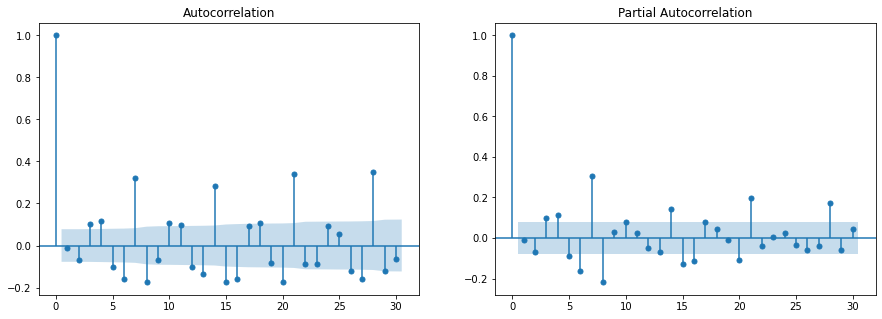

In [25]:
residuals = m1_3.resid
residual_diag(residuals)

- 2. AIC

In [26]:
print('model2 AIC :', m1_3.aic)

model2 AIC : 5171.9201501481175


- 3. Validation

In [27]:
pred = m1_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 11.590500479029398
MAPE: 0.11049384327992426


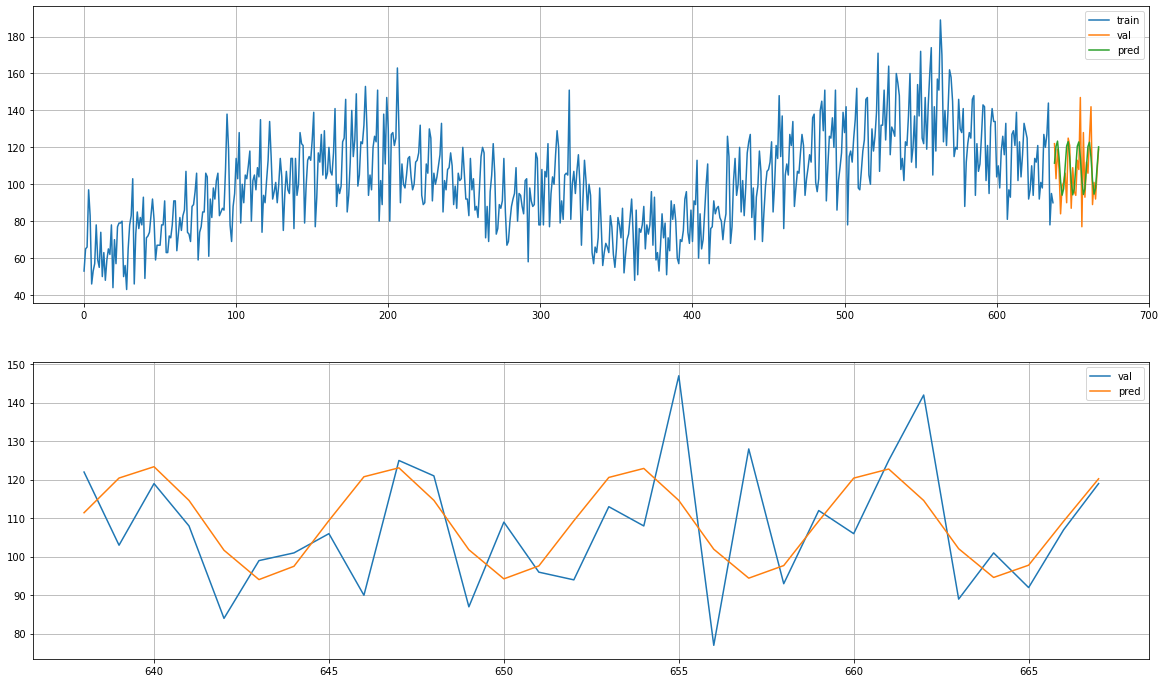

In [28]:
plot_model_result(y_train, y_val, pred)

### 4. Î™®Îç∏ÎßÅ2 : SARIMA

#### 1) ÌïôÏäµ

- Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï

In [29]:
m2_1 = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(1,1,1,7)).fit()

#### 2) ÌèâÍ∞Ä

- 1. ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00274
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


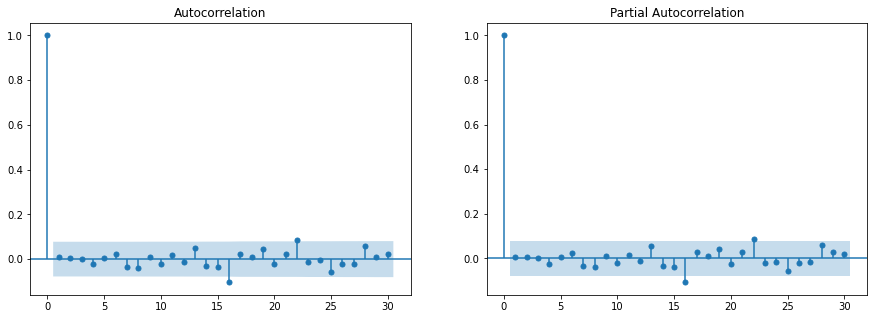

In [30]:
residuals = m2_1.resid
residual_diag(residuals)

- 2. AIC

In [31]:
print('model2_0 AIC :', m2_1.aic)

model2_0 AIC : 4846.302440142703


- 3. Validation

In [32]:
pred = m2_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.942958528277967
MAPE: 0.0733998184034363


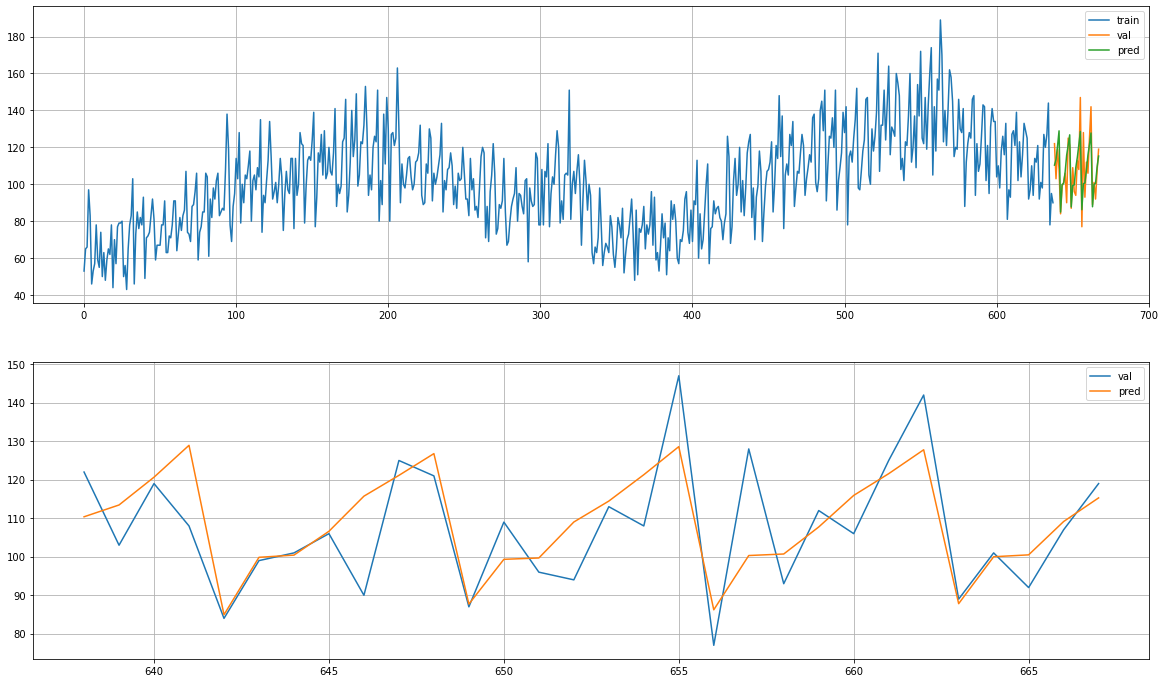

In [33]:
plot_model_result(y_train, y_val, pred)

#### 3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

- 1 ÌïôÏäµ

In [34]:
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)


In [35]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})
result

params(P,D,Q)       mae          aic
0     (1, 1, 1)  7.942959  4846.302440
1     (1, 1, 2)  8.114582  4848.938479
2     (1, 1, 3)  8.146529  4850.563091
3     (2, 1, 1)  8.154073  4848.678504
4     (2, 1, 2)  8.083314  4850.597054
5     (2, 1, 3)  8.044561  4848.905293
6     (3, 1, 1)  7.934638  4849.688099
7     (3, 1, 2)  8.002225  4852.041935
8     (3, 1, 3)  8.094993  4853.140259

In [36]:
display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)       mae          aic
6     (3, 1, 1)  7.934638  4849.688099

params(P,D,Q)       mae         aic
0     (1, 1, 1)  7.942959  4846.30244

In [37]:
m2_2 = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(1,1,1,7)).fit()
m2_3 = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(1,1,1,7)).fit()

- 2. ÌèâÍ∞Ä

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00274
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


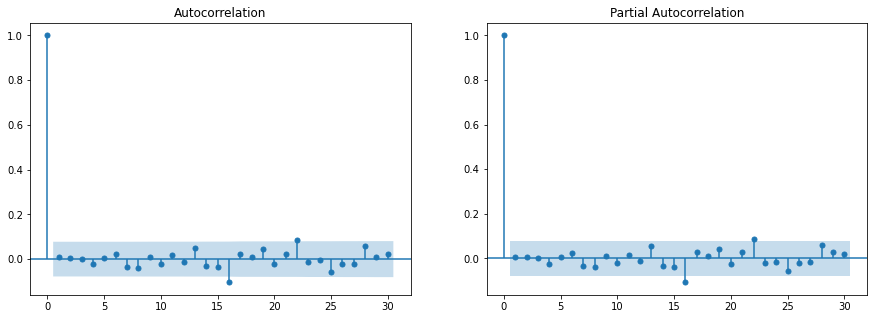

In [38]:
# ÏûîÏ∞®ÏßÑÎã®
residuals = m2_2.resid
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00274
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


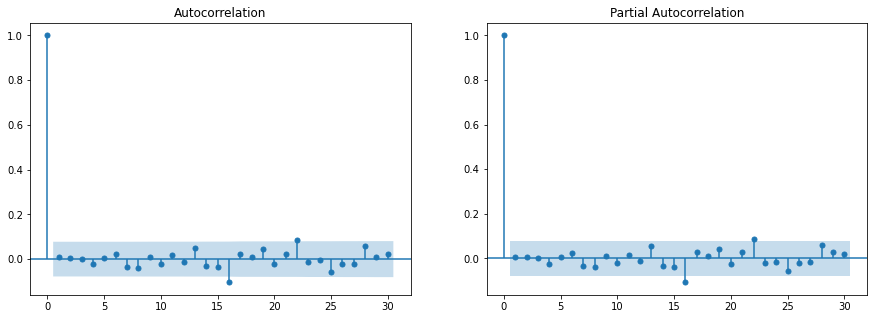

In [39]:
residuals = m2_3.resid
residual_diag(residuals)

In [40]:
# AIC
print('model2_2 AIC :', m2_2.aic)
print('model2_3 AIC :', m2_3.aic)

model2_2 AIC : 4846.302440142703
model2_3 AIC : 4846.302440142703


In [41]:
# Validation
pred = m2_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.942958528277967
MAPE: 0.0733998184034363


### 5. Î™®Îç∏ÎßÅ3 : SARIMAX

In [42]:
# Ï†ÑÏ≤òÎ¶¨
# Í∞ÄÎ≥ÄÏàòÌôî
x2 = pd.get_dummies(x, columns = ['weekday'], drop_first=False)

# feature engineering
x2['sales_lag7'] = x2['sales'].shift(6)
x2.head(10)

sales  weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0     45            0            0            0            0            0   
1     53            0            0            0            0            0   
2     65            0            0            0            0            1   
3     66            1            0            0            0            0   
4     97            0            0            1            0            0   
5     83            0            0            0            1            0   
6     46            0            1            0            0            0   
7     53            0            0            0            0            0   
8     57            0            0            0            0            0   
9     78            0            0            0            0            1   

   weekday_Tue  weekday_Wed  sales_lag7  
0            1            0         NaN  
1            0            1         NaN  
2            0            0         NaN  
3            0            0         NaN  
4            0            0         NaN  
5            0            0         NaN  
6            0            0        45.0  
7            1            0        53.0  
8            0            1        65.0  
9            0            0        66.0

In [43]:
x3, y3 = x2[6:].copy(), y[6:].copy()

x3.reset_index(drop = True, inplace = True)
y3.reset_index(drop = True, inplace = True)
x3.head()

sales  weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0     46            0            1            0            0            0   
1     53            0            0            0            0            0   
2     57            0            0            0            0            0   
3     78            0            0            0            0            1   
4     59            1            0            0            0            0   

   weekday_Tue  weekday_Wed  sales_lag7  
0            0            0        45.0  
1            1            0        53.0  
2            0            1        65.0  
3            0            0        66.0  
4            0            0        97.0

In [45]:
# train, test ÎÇòÎàÑÍ∏∞
x_train, x_val, y_train, y_val = train_test_split(x3, y3, test_size = 30, shuffle = False)

#### 1) ÌïôÏäµ

- exog=x_train ÏòµÏÖò ÏßÄÏ†ï

In [46]:
m3_1 = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(1,1,1,7), exog=x_train).fit()

#### 2) ÌèâÍ∞Ä

- 1. ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


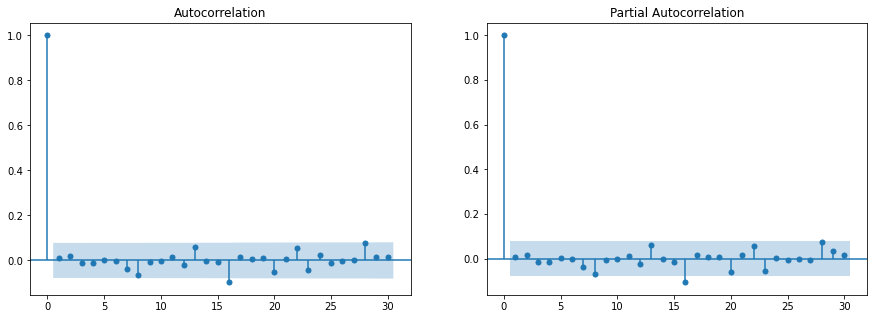

In [47]:
residuals = m3_1.resid
residual_diag(residuals)

- 2. AIC

In [48]:
print('m3_1 AIC :', m3_1.aic)

m3_1 AIC : 4822.819382800159


- 3. Validation

In [49]:
pred = m3_1.forecast(30,  exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.790412607901317
MAPE: 0.07225423363030757


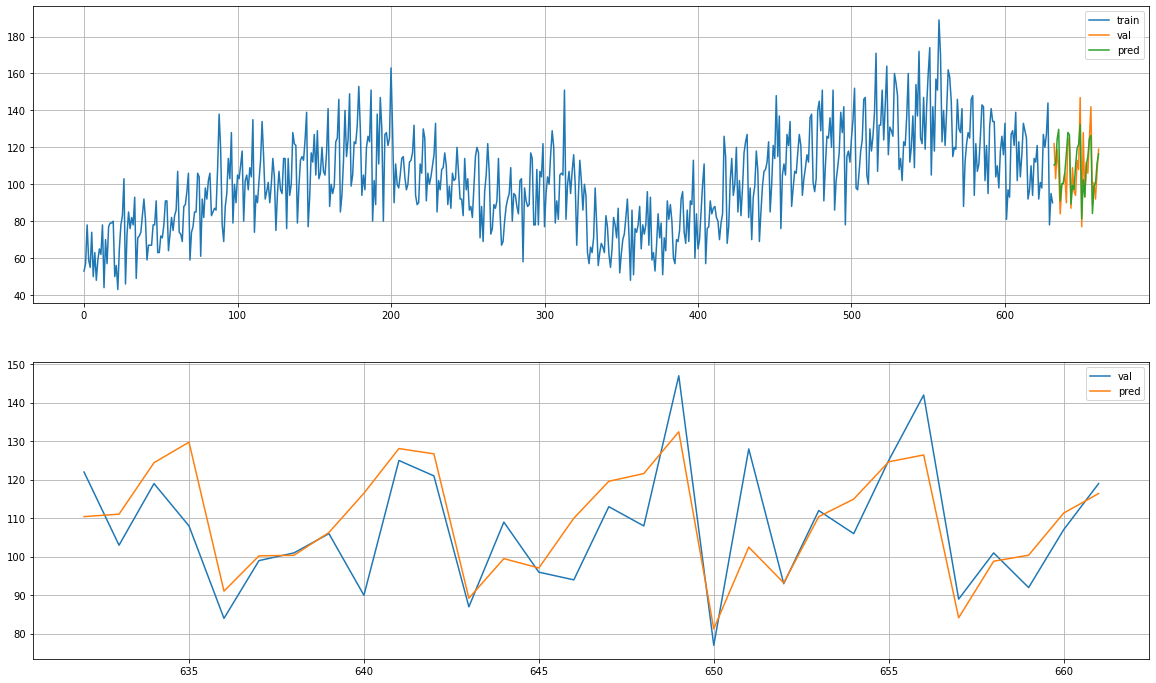

In [50]:
plot_model_result(y_train, y_val, pred)